In [90]:
import pandas as pd
import numpy as np
import os

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

#matplotlib.rcParams['figure.figsize'] = (10, 10)

In [91]:
#데이터 가져오기

PATH = os.path.join("datasets","youtube-new")

def load_data(filename, path = PATH):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path)

my_df = load_data("USvideos.csv")
my_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [92]:
#시간 표시하는 형식을 바꿔줌

my_df['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [93]:
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_df['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [94]:
#!!!!!!!!!!!!!!!!!!!!!!!!!다시 돌리지 말것
# 날짜랑 시간 분리해서 저장
my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time
my_df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-13,17:13:01
1,2017-11-13,07:30:00
2,2017-11-12,19:05:24
3,2017-11-13,11:00:04
4,2017-11-12,18:01:41


In [95]:
#데이터 유형 처리중
# 일부 열은 pandas에서 부적절한 데이터 유형을 가진다
# 예를 들면 뷰,좋아요 등은 float 대신 int 데이터 형식만 필요하며
# nominal특성인 카테고리id는 int데이터 형식을 포함하지 않아야함

type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    my_df[column] = my_df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    my_df[column] = my_df[column].astype(str)

In [96]:
# category_id 열 처리 중
# 여기에서는 조회에 US_category_id.json 파일을 사용하여 category_id 열 뒤에 category 열을 추가합니다.

# creates a dictionary that maps `category_id` to `category`
id_to_category = {}

with open(os.path.join(PATH, 'US_category_id.json'), 'r') as f:
    data = json.load(f)
    #items에서 id의 숫자 종류별로 타이틀을 분류
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [97]:
#분류한 것들을 추가해서 확인해보는 과정
#!!!!!다시돌리려면 첫줄없애고 돌려야할듯
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df[['category_id', 'category']].head()

,category_id,category
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [98]:
#상관분석 및 히트맵

keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] # 이변수들만확인
corr_matrix = my_df[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


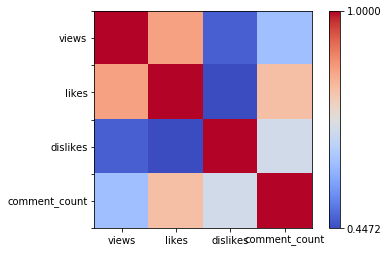

In [99]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# 오른쪽에 쿨&웜 바 생성
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
# 표 라벨 보폭을 맞추기 위해서 x와y를 따로 라벨만듦
ylabels = ['']
xlabels = ['']
for column in keep_columns:
    ylabels.append(column)
    xlabels.append(column)
    ylabels.append('')
ax.set_yticklabels(ylabels, minor=False)
ax.set_xticklabels(xlabels, minor=False)
plt.show()

In [106]:
# 몇일동안이나 유행한 비디오 처리
# 여러 동영상이 Google의 데이터 세트에 여러 번 표시되는데,
#그 이유는 여러 날 동안의 인기 급상승 이었기 때문
#여기서는 중복 된 항목을 제거하고 각 동영상의 마지막 항목 만 유지
#해당 항목은 해당 동영상의 최신 통계를 업데이트해야하기 때문

print(my_df.shape)
#수행할 열을 지정해주고 마지막 열만 남기는 조건 넣고
#다른 함수를 쓰니까 됐다
my_df = my_df.drop_duplicates(['title'], keep='last')
print(my_df.shape)
my_df.index.duplicated().any()

(6455, 18)
(6455, 18)


False

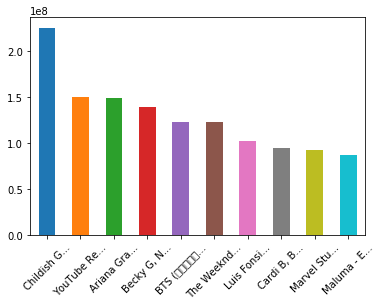

In [113]:
def visualize_most(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()
visualize_most(my_df, 'views')

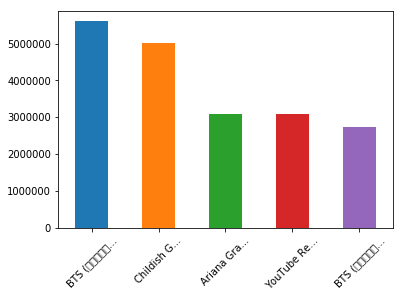

In [114]:
visualize_most(my_df, 'likes', num=5) # only visualizes the top 5

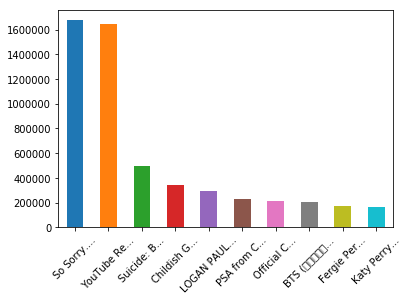

In [115]:
visualize_most(my_df, 'dislikes')

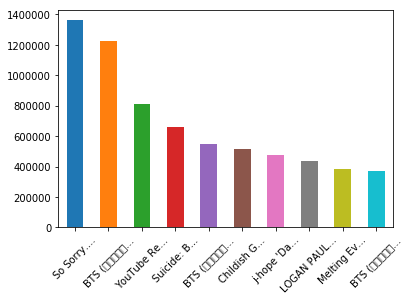

In [116]:
visualize_most(my_df, 'comment_count')

In [118]:
# 비디오 관련 통계 시각화

# 옆에 있는 통계를 시각화하는 기능
def visualize_statistics(my_df, id_list): # taking a list of video ids
    target_df = my_df.loc[id_list]
    
    ax = target_df[['views', 'likes', 'dislikes', 'comment_count']].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

# 누적된 좋아요와 싫어요 시각화하는 기능
def visualize_like_dislike(my_df, id_list):
    target_df = my_df.loc[id_list]
    
    ax = target_df[['likes', 'dislikes']].plot.bar(stacked=True)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

In [120]:
# 그런 다음 데이터 세트에서
# 무작위 샘플을 생성하되 특별히 보려는 비디오의 ID 목록을 항상 전달가능

sample_id_list = my_df.sample(n=10, random_state=4).index
# creates a random sample of 10 video IDs
sample_id_list

Int64Index([34744, 28138, 4396, 14598, 4981, 19571, 16555, 7389, 20739, 5446], dtype='int64')

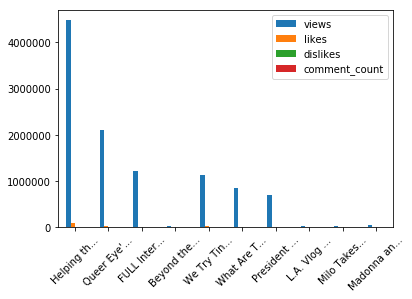

In [121]:
visualize_statistics(my_df, sample_id_list)

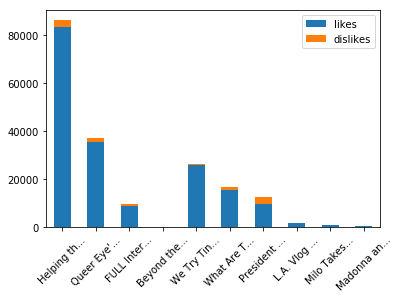

In [122]:
visualize_like_dislike(my_df, sample_id_list)

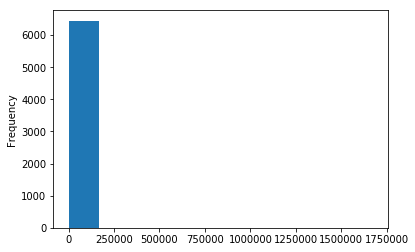

In [124]:
# 히스토그램

my_df['dislikes'].plot.hist()

plt.show()

In [126]:
# 인기있는 카테고리 분석 

category_count = my_df['category'].value_counts() # frequency for each category
category_count


Entertainment            1644
Music                     821
Howto & Style             601
Comedy                    548
News & Politics           510
People & Blogs            502
Sports                    455
Science & Technology      391
Film & Animation          322
Education                 257
Pets & Animals            144
Gaming                    104
Autos & Vehicles           73
Travel & Events            64
Nonprofits & Activism      15
Shows                       4
Name: category, dtype: int64